In [ ]:
'''
import os
import librosa
from IPython.display import Audio
from os import walk
from scipy.io.wavfile import write

# ré-échantillonnage des morceaux de 44100 Hz à 11025 Hz
# à faire une seule fois pour Sources et Mixtures, et pour Dev et Test

path = "/home/papaxanthos/Documents/Datascientest/DSD100/DSD100/Sources/Test/"
path2 = "/home/papaxanthos/Documents/Datascientest/DSD100/DSD100_2/Sources/Test/"

dirs = os.listdir(path)

for file in dirs:
    print(file)
        
    os.mkdir(path2 + file)

    mixture = path + file + '/vocals.wav'
    
    audio_mixture, fe = librosa.load(path = mixture, sr = 44100)
    
    audio_mixture2 = librosa.resample(audio_mixture, 44100, 11025)  
    
    write(path2 + file + "/vocals.wav", 11025, audio_mixture2)
       
#Audio(data = audio_mixture2, rate = 11025)
'''

'\nimport os\nimport librosa\nfrom IPython.display import Audio\nfrom os import walk\nfrom scipy.io.wavfile import write\n\n# ré-échantillonnage des morceaux de 44100 Hz à 11025 Hz\n# à faire une seule fois pour Sources et Mixtures, et pour Dev et Test\n\npath = "/home/papaxanthos/Documents/Datascientest/DSD100/DSD100/Sources/Test/"\npath2 = "/home/papaxanthos/Documents/Datascientest/DSD100/DSD100_2/Sources/Test/"\n\ndirs = os.listdir(path)\n\nfor file in dirs:\n    print(file)\n        \n    os.mkdir(path2 + file)\n\n    mixture = path + file + \'/vocals.wav\'\n    \n    audio_mixture, fe = librosa.load(path = mixture, sr = 44100)\n    \n    audio_mixture2 = librosa.resample(audio_mixture, 44100, 11025)  \n    \n    write(path2 + file + "/vocals.wav", 11025, audio_mixture2)\n       \n#Audio(data = audio_mixture2, rate = 11025)\n'

In [1]:
# On charge les noms des chansons

from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)

path = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/"

dirs = os.listdir(path)

path2 = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/"

dirs2 = os.listdir(path2)

Mounted at /content/gdrive


In [2]:
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa.display

# TRAINING SET

Zxx1_all_vi = []

Y_VI = []

Y_VAD = []

sampl_rate = 11025

# Découpage du spectrogramme en petit morceau de taille "taille", doit être pair
taille = 10

# On ne prend que 30 sec de chaque morceau
debut = 90*sampl_rate
fin = 120*sampl_rate

# Définition des seuils
seuil_VAD = 10
seuil_VI = 0.55

# Pour la VAD on se restreint aux n premières fréquences car la voix est surtout présente à ces fréquences
restriction = 400

# Boucle sur la base de données
for i in range (0,50,1):

    print(i, '----', dirs[i])
    
    mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/" + dirs[i] + '/mixture.wav'
        
    audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
    vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Dev/" + dirs[i] + '/vocals.wav'
        
    audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)
    
    # Passage dans le domaine spectral
    f, t, Zxx1 = signal.stft(audio_mixture[debut:fin], fs=sampl_rate, nperseg=1024)
    f, t, Zxx2 = signal.stft(audio_vocal[debut:fin], fs=sampl_rate, nperseg=1024)
    
    a, b = Zxx1.shape

    # Normalisation par morceau
    Zxx1_norm = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)
    Zxx1_norm = Zxx1_norm/np.max(Zxx1_norm)

    for j in range(b-taille):
   
        # Pour VI
        Zxx1_i = Zxx1_norm[:,0+j:taille+1+j]
      
        Zxx1_i_vector = np.reshape(Zxx1_i, -1)   
    
        Zxx1_all_vi.append(Zxx1_i_vector)
          
    Zxx2_abs = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)

    ###################################################
    ####################### VI #######################
    ###################################################

    seuil = np.max(Zxx2_abs)*seuil_VI
    
    matrice_01 = Zxx2_abs * 0
    matrice_01[Zxx2_abs>seuil] = 1
    matrice_01_i = matrice_01[:,int(taille/2):b-int(taille/2)]
    Y = np.transpose(matrice_01_i) 

    if i == 0:
        Y_VI.append(Y)
        Y_VI = Y_VI[0][:][:]
        #print(Y2.shape)
        #print('')
    else:
        Y_VI = np.append(Y_VI,Y,axis=0)    
        #print(Y2.shape)
        #print('')

    ###################################################
    ####################### VAD #######################
    ###################################################

    matrice_01_sum = matrice_01.sum(axis=0)

    vector = matrice_01_sum * 0
    for k in range(len(vector)):
        if matrice_01_sum[k] > seuil_VAD:
            vector[k] = 1
            
    y = vector[int(taille/2):b-int(taille/2)]
    Y_VAD = np.append(Y_VAD,y)

0 ---- The Long Wait - Dark Horses
1 ---- St Vitus - Word Gets Around
2 ---- Moosmusic - Big Dummy Shake
3 ---- Enda Reilly - Cur An Long Ag Seol
4 ---- Giselle - Moss
5 ---- Lyndsey Ollard - Catching Up
6 ---- Johnny Lokke - Whisper To A Scream
7 ---- Mu - Too Bright
8 ---- Wall Of Death - Femme
9 ---- Flags - 54
10 ---- Ben Carrigan - We'll Talk About It All Tonight
11 ---- Fergessen - Nos Palpitants
12 ---- Angels In Amplifiers - I'm Alright
13 ---- ANiMAL - Easy Tiger
14 ---- North To Alaska - All The Same
15 ---- Secretariat - Borderline
16 ---- The Sunshine Garcia Band - For I Am The Moon
17 ---- Detsky Sad - Walkie Talkie
18 ---- Leaf - Summerghost
19 ---- Hollow Ground - Left Blind
20 ---- Georgia Wonder - Siren
21 ---- The Doppler Shift - Atrophy
22 ---- Traffic Experiment - Once More (With Feeling)
23 ---- Speak Softly - Like Horses
24 ---- Triviul feat. The Fiend - Widow
25 ---- Titanium - Haunted Age
26 ---- Tim Taler - Stalker
27 ---- Actions - Devil's Words
28 ---- Young 

In [3]:
print(np.shape(Zxx1_all_vi))
print(np.shape(Y_VAD))
print(np.shape(Y_VI))

(31850, 5643)
(31850,)
(31850, 513)


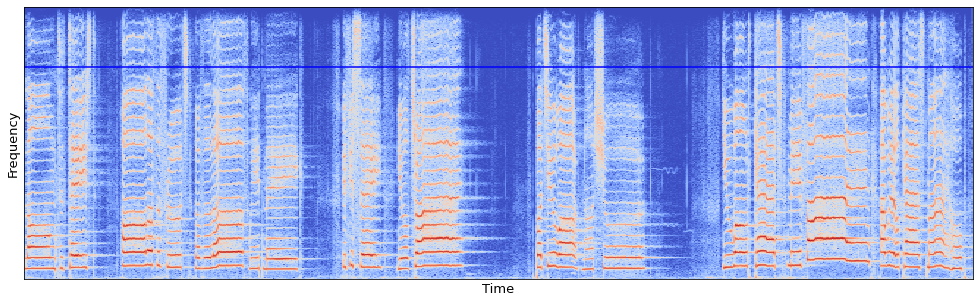

In [4]:
# On visualise un spectrogramme vocal

import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(17,5))
librosa.display.specshow(Zxx2_abs, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.axhline(restriction,color='b')
plt.show();

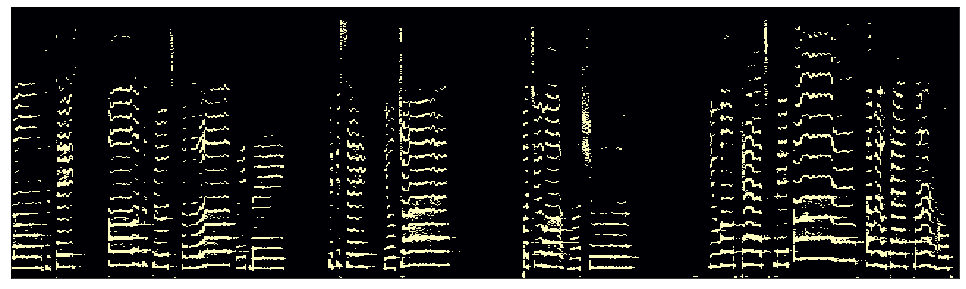

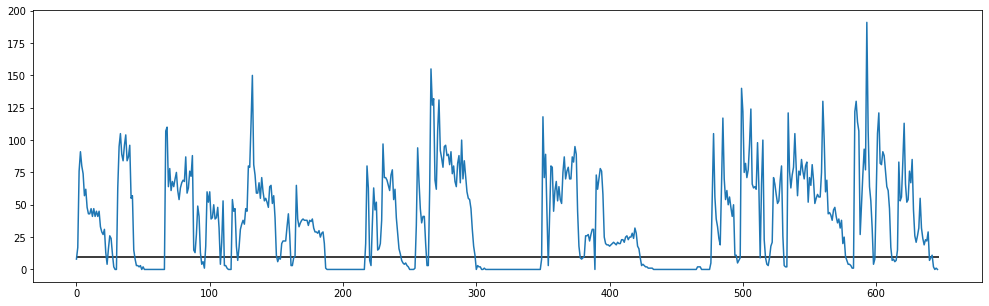

In [5]:
# On affiche la courbe qui donne la somme pour chaque pas de temps du spectrogramme vocal
# Et on vérifie visuellement que le seuil fixé est cohérent

plt.figure(figsize=(17,5))
librosa.display.specshow(matrice_01);

plt.figure(figsize=(17,5))
plt.plot(matrice_01_sum)
plt.hlines(seuil_VAD, 0, len(matrice_01_sum));

In [ ]:
from scipy.io.wavfile import write
from IPython.display import Audio

# On écoute un mix
signal_reconstruit = signal.istft(Zxx1, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/....wav", sampl_rate, pour_export.astype(np.float32))

In [ ]:
# On écoute le canal vocal correspondant au mix précédent
signal_reconstruit = signal.istft(Zxx2, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/....wav", sampl_rate, pour_export.astype(np.float32))

In [ ]:
# Ecoute de la cible correspondante, ie le mix x la matrice de 0 et 1 et on vérifie par l'écoute que le seuil est cohérent
produit = matrice_01 * Zxx1

signal_reconstruit = signal.istft(produit, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/....wav", sampl_rate, pour_export.astype(np.float32))

In [6]:
# TESTING SET

Zxx1_all_vi_test = []

Y_VI_test = []

Y_VAD_test = []

# Boucle sur un certain nombres de morceaux de validation
l = -1
for i in range (0,50,1):
    l = l + 1

    print(i, '----', dirs2[i])
    
    mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/" + dirs2[i] + '/mixture.wav'
        
    audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
    vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Test/" + dirs2[i] + '/vocals.wav'
        
    audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)
    
    # Passage dans le domaine spectral
    f, t, Zxx1 = signal.stft(audio_mixture[debut:fin], fs=sampl_rate, nperseg=1024)
    f, t, Zxx2 = signal.stft(audio_vocal[debut:fin], fs=sampl_rate, nperseg=1024)
    
    a, b = Zxx1.shape

    # Normalisation par morceau
    Zxx1_norm = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)
    Zxx1_norm = Zxx1_norm/np.max(Zxx1_norm)

    for j in range(b-taille):

        # Pour VI
        Zxx1_i = Zxx1_norm[:,0+j:taille+1+j]
      
        Zxx1_i_vector = np.reshape(Zxx1_i, -1)
    
        Zxx1_all_vi_test.append(Zxx1_i_vector)

    Zxx2_abs = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)

    ###################################################
    ####################### VI #######################
    ###################################################

    seuil = np.max(Zxx2_abs)*seuil_VI
    
    matrice_01 = Zxx2_abs * 0
    matrice_01[Zxx2_abs>seuil] = 1
    matrice_01_i = matrice_01[:,int(taille/2):b-int(taille/2)]
    Y = np.transpose(matrice_01_i) 

    if i == 0:
        Y_VI_test.append(Y)
        Y_VI_test = Y_VI_test[0][:][:]
        #print(Y2.shape)
        #print('')
    else:
        Y_VI_test = np.append(Y_VI_test,Y,axis=0)    
        #print(Y2.shape)
        #print('')

    ###################################################
    ####################### VAD #######################
    ###################################################

    matrice_01_sum = matrice_01.sum(axis=0)

    vector = matrice_01_sum * 0
    for k in range(len(vector)):
        if matrice_01_sum[k] > seuil_VAD:
            vector[k] = 1
            
    y = vector[int(taille/2):b-int(taille/2)]
    Y_VAD_test = np.append(Y_VAD_test,y)

0 ---- Zeno - Signs
1 ---- The Long Wait - Back Home To Blue
2 ---- Young Griffo - Facade
3 ---- The Mountaineering Club - Mallory
4 ---- Louis Cressy Band - Good Time
5 ---- Atlantis Bound - It Was My Fault For Waiting
6 ---- Dark Ride - Burning Bridges
7 ---- Traffic Experiment - Sirens
8 ---- Hollow Ground - Ill Fate
9 ---- Tom McKenzie - Directions
10 ---- Triviul - Dorothy
11 ---- Signe Jakobsen - What Have You Done To Me
12 ---- BKS - Too Much
13 ---- Sambasevam Shanmugam - Kaathaadi
14 ---- Leaf - Come Around
15 ---- Swinging Steaks - Lost My Way
16 ---- Fergessen - The Wind
17 ---- Phre The Eon - Everybody's Falling Apart
18 ---- Raft Monk - Tiring
19 ---- Carlos Gonzalez - A Place For Us
20 ---- Nerve 9 - Pray For The Rain
21 ---- Speak Softly - Broken Man
22 ---- ANiMAL - Rockshow
23 ---- Spike Mullings - Mike's Sulking
24 ---- Al James - Schoolboy Facination
25 ---- James May - Dont Let Go
26 ---- Voelund - Comfort Lives In Belief
27 ---- Bobby Nobody - Stitch Up
28 ---- Mot

In [7]:
print(np.shape(Zxx1_all_vi_test))
print(np.shape(Y_VAD_test))
print(np.shape(Y_VI_test))

(31850, 5643)
(31850,)
(31850, 513)


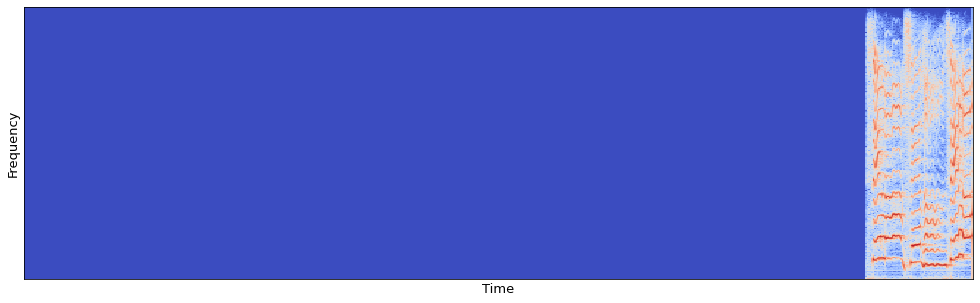

In [8]:
# Même procédure que précédemment, on visualise un vocal

plt.figure(figsize=(17,5))
librosa.display.specshow(Zxx2_abs, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.show();

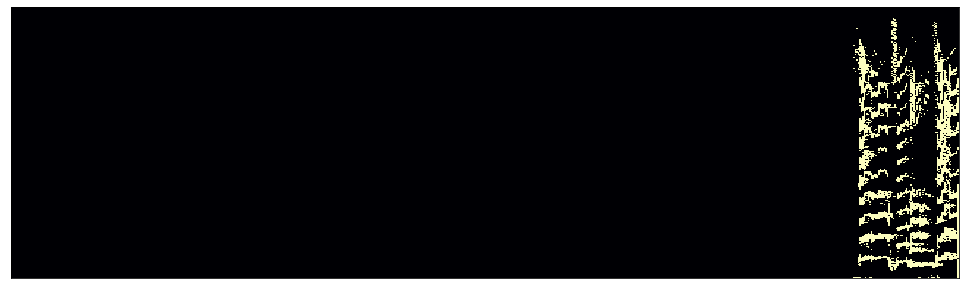

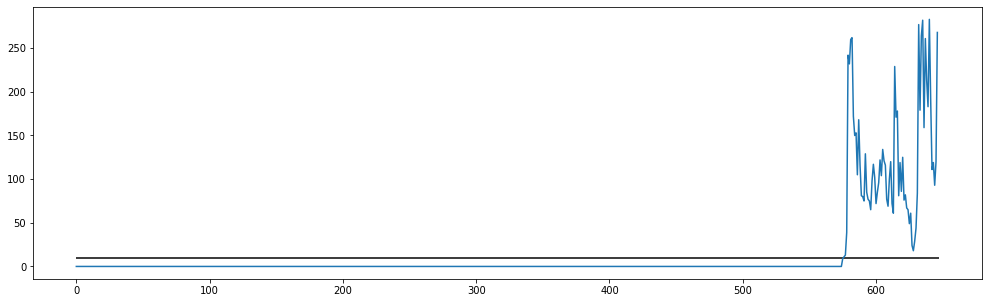

In [9]:
plt.figure(figsize=(17,5))
librosa.display.specshow(matrice_01);

plt.figure(figsize=(17,5))
plt.plot(matrice_01_sum)
plt.hlines(seuil_VAD, 0, len(matrice_01_sum));

In [ ]:
from scipy.io.wavfile import write
# Ecoute du mix
signal_reconstruit = signal.istft(Zxx1, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/....wav", sampl_rate, pour_export.astype(np.float32))

In [ ]:
# Ecoute du canal vocal
signal_reconstruit = signal.istft(Zxx2, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/....wav", sampl_rate, pour_export.astype(np.float32))

In [ ]:
# Ecoute de la cible
produit = matrice_01 * Zxx1

signal_reconstruit = signal.istft(produit, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/....wav", sampl_rate, pour_export.astype(np.float32))



10627 21223


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


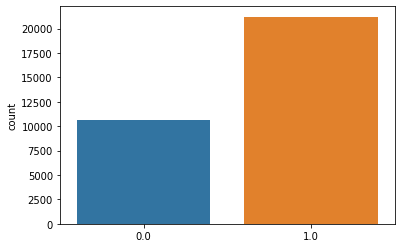

In [10]:
# Nombre de 0 et de 1 : vérification que le jeu de données n'est pas trop déséquilibré

import seaborn as sns

sns.countplot(Y_VAD);

nombre_0 = np.count_nonzero(Y_VAD==0)
nombre_1 = np.count_nonzero(Y_VAD==1)

print(nombre_0, nombre_1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


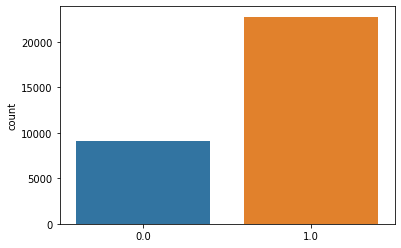

In [11]:
sns.countplot(Y_VAD_test);

In [12]:
# On transforme les données d'entrée, vecteur --> matrice

X_train_VI = np.array(Zxx1_all_vi).reshape((-1,513,taille+1,1))

X_test_VI = np.array(Zxx1_all_vi_test).reshape((-1,513,taille+1,1)) 

y_train_VAD = Y_VAD

y_test_VAD = Y_VAD_test

y_train_VI = Y_VI

y_test_VI = Y_VI_test

# Shuffle
import random

c = list(zip(X_train_VI, y_train_VAD, y_train_VI))
random.shuffle(c)
X_train_VI, y_train_VAD, y_train_VI = zip(*c)
X_train_VI = np.array(X_train_VI)
y_train_VAD = np.array(y_train_VAD)
y_train_VI = np.array(y_train_VI)

d = list(zip(X_test_VI, y_test_VAD, y_test_VI))
random.shuffle(d)
X_test_VI, y_test_VAD, y_test_VI = zip(*d)
X_test_VI = np.array(X_test_VI)
y_test_VAD = np.array(y_test_VAD)
y_test_VI = np.array(y_test_VI)

print(X_train_VI.shape)
print(X_test_VI.shape)
print(y_train_VAD.shape)
print(y_test_VAD.shape)
print(y_train_VI.shape)
print(y_test_VI.shape)

(31850, 513, 11, 1)
(31850, 513, 11, 1)
(31850,)
(31850,)
(31850, 513)
(31850, 513)


In [13]:
################################################
##################### VAD ######################
################################################

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

model = tf.keras.Sequential()

model.add(Conv2D(16, (5,3), padding='same', input_shape=(restriction,taille+1,1)))
model.add(tf.keras.layers.LeakyReLU())

model.add(Conv2D(16, (5,3), padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.25))

model.add(Conv2D(16,(5,3),padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(16,(5,3),padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64))
model.add(tf.keras.layers.LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=keras.losses.binary_crossentropy, optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 11, 16)       256       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 400, 11, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 400, 11, 16)       3856      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 400, 11, 16)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 11, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 200, 11, 16)       0         
                                                        

In [14]:
'''
if nombre_0 > nombre_1:
   class_weight = {0: 1., 1: nombre_0/nombre_1}
else:
   class_weight = {0: nombre_1/nombre_0, 1: 1.0}
'''

epok = 20
training_history = model.fit(X_train_VI[:,0:restriction,:,:], y_train_VAD, validation_data = (X_test_VI[:,0:restriction,:,:], y_test_VAD), epochs = epok, batch_size = 32)

Epoch 1/20
996/996 [==============================] - 20s 11ms/step - loss: 0.5287 - accuracy: 0.7345 - val_loss: 0.4214 - val_accuracy: 0.7934
Epoch 2/20
996/996 [==============================] - 10s 10ms/step - loss: 0.2896 - accuracy: 0.8781 - val_loss: 0.4764 - val_accuracy: 0.7759
Epoch 3/20
996/996 [==============================] - 10s 10ms/step - loss: 0.2345 - accuracy: 0.9061 - val_loss: 0.5308 - val_accuracy: 0.7717
Epoch 4/20
996/996 [==============================] - 10s 10ms/step - loss: 0.2105 - accuracy: 0.9162 - val_loss: 0.5220 - val_accuracy: 0.7768
Epoch 5/20
996/996 [==============================] - 10s 10ms/step - loss: 0.1965 - accuracy: 0.9207 - val_loss: 0.5153 - val_accuracy: 0.7778
Epoch 6/20
996/996 [==============================] - 10s 10ms/step - loss: 0.1788 - accuracy: 0.9313 - val_loss: 0.5218 - val_accuracy: 0.7916
Epoch 7/20
996/996 [==============================] - 10s 10ms/step - loss: 0.1721 - accuracy: 0.9332 - val_loss: 0.5422 - val_accuracy:

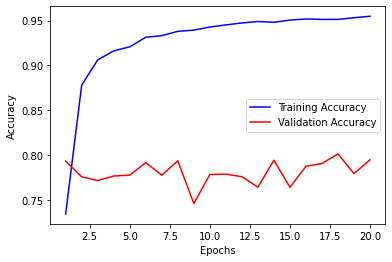

In [15]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1,epok+1,1),train_acc, label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok+1,1),val_acc, label='Validation Accuracy', color='red')

plt.legend()

plt.show()

In [16]:
# Modification de la base de données d'entrainement du VI afin de supprimer les pas de temps où pas de chant

# Possibilité 1 : ici on ajuste les données du VI à partir du True ie si ça comporte de la voix ou pas
'''
index_train_0 = np.where(y_train_VAD == 0)[0]
index_test_0 = np.where(y_test_VAD == 0)[0]

X_train_VI2 = np.delete(X_train_VI, index_train_0, axis=0)
X_test_VI2 = np.delete(X_test_VI, index_test_0, axis=0)

y_train_VI2 = np.delete(y_train_VI, index_train_0, axis=0)
y_test_VI2 = np.delete(y_test_VI, index_test_0, axis=0)
'''
# Possibilité 2 : ici on ajuste les données du VI à partir de la sortie de l'étape de VAD, ie qu'il peut y avoir des erreurs, de la voix prédite alors qu'il y en a pas ou pas de voix prédite alors qu'il y en a, 
# on espère dans ce cas que le second réseau de neurones (VI) va corriger ces erreurs.

prediction_train = model.predict(X_train_VI[:,0:restriction,:,:])
prediction_train = np.round(prediction_train)

index = []
for i in range(len(prediction_train)):
    if prediction_train[i] != y_train_VAD[i]:
       index.append(i)

X_train_VI2 = np.delete(X_train_VI, index, axis=0)
y_train_VI2 = np.delete(y_train_VI, index, axis=0)


prediction_test = model.predict(X_test_VI[:,0:restriction,:,:])
prediction_test = np.round(prediction_test)

index = []
for i in range(len(prediction_test)):
    if prediction_test[i] != y_test_VAD[i]:
       index.append(i)

X_test_VI2 = np.delete(X_test_VI, index, axis=0)
y_test_VI2 = np.delete(y_test_VI, index, axis=0)


print(np.shape(X_train_VI2))
print(np.shape(X_test_VI2))
print(np.shape(y_train_VI2))
print(np.shape(y_test_VI2))

(31186, 513, 11, 1)
(25317, 513, 11, 1)
(31186, 513)
(25317, 513)


In [17]:
# Custom MSE pour forcer la prédiction des pixels 1, attention, réduit la bonne prédiction des pixels 0, équilibre à trouver

import keras
from keras import backend as K

def custom_mse(y_true, y_pred):
    mask1 = y_true
    mask2 = 1 - y_true
    lambda1 = 1.5 # (y_true = 1 et y_pred = 0) renforce l'erreur 
    lambda2 = 1
    return K.mean(K.square(y_pred - y_true)*mask1*lambda1 + K.square(y_pred - y_true)*mask2*lambda2, axis=-1)

In [18]:
def recall(y_true, y_pred):
    TP = K.sum(y_true * K.round(y_pred))
    FN = K.sum(y_true* K.round(1-y_pred))
    if TP + FN == 0.0:
      recall = 0.0
    else:
      recall = TP / (TP + FN)
    return recall

def precision(y_true, y_pred):
    TP = K.sum(y_true * K.round(y_pred))
    FP = K.sum((1-y_true) * K.round(y_pred))
    if TP + FP == 0.0:
      precision = 0.0
    else:
      precision = TP / (TP + FP)
    return precision

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0.0:
      return 0.0
    else:
      return 2*p*r/(p+r)

def accuracy2(y_true, y_pred):
    #return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1))) # formule si accuracy
    return K.mean(K.equal(y_true, K.round(y_pred))) # formule si BinaryAccuracy, cf https://datascience.stackexchange.com/questions/14415/how-does-keras-calculate-accuracy


def a1(y_true, y_pred):
    somme = K.sum(y_true)
    if somme == 0 :
      return 0.0
    else:
      return K.sum(y_true * K.round(y_pred)) / somme

def a2(y_true, y_pred):
    return K.sum((1-y_true) * (1-K.round(y_pred))) / K.sum(1-y_true)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D, Cropping2D
from tensorflow.keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Deconv2D

##################################################
################## VI ############################
##################################################

model2 = tf.keras.Sequential()

# Modèle mixte
model2.add(Conv2D(32, (3,3), padding='same', input_shape=(513,taille+1,1)))
model2.add(Activation('relu'))
model2.add(Conv2D(16, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(16, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,1)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(513))
model2.add(Activation('sigmoid'))


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
model2.compile(loss=custom_mse, optimizer=opt, metrics=['BinaryAccuracy',a1,a2])#tf.keras.losses.MeanSquaredError()

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 513, 11, 32)       320       
                                                                 
 activation (Activation)     (None, 513, 11, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 513, 11, 16)       4624      
                                                                 
 activation_1 (Activation)   (None, 513, 11, 16)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 256, 5, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 256, 5, 16)        0         
                                                      

In [20]:
epok = 20
training_history = model2.fit(X_train_VI2, y_train_VI2, validation_data = (X_test_VI2, y_test_VI2), epochs = epok, batch_size = 32)

Epoch 1/20
975/975 [==============================] - 9s 8ms/step - loss: 0.1684 - binary_accuracy: 0.8272 - a1: 0.1167 - a2: 0.9693 - val_loss: 0.1858 - val_binary_accuracy: 0.7954 - val_a1: 0.2675 - val_a2: 0.9565
Epoch 2/20
975/975 [==============================] - 7s 7ms/step - loss: 0.1462 - binary_accuracy: 0.8389 - a1: 0.3469 - a2: 0.9368 - val_loss: 0.1709 - val_binary_accuracy: 0.8134 - val_a1: 0.3932 - val_a2: 0.9415
Epoch 3/20
975/975 [==============================] - 7s 7ms/step - loss: 0.1334 - binary_accuracy: 0.8534 - a1: 0.4459 - a2: 0.9344 - val_loss: 0.1608 - val_binary_accuracy: 0.8224 - val_a1: 0.4777 - val_a2: 0.9275
Epoch 4/20
975/975 [==============================] - 7s 7ms/step - loss: 0.1261 - binary_accuracy: 0.8615 - a1: 0.4913 - a2: 0.9348 - val_loss: 0.1585 - val_binary_accuracy: 0.8266 - val_a1: 0.4740 - val_a2: 0.9344
Epoch 5/20
975/975 [==============================] - 7s 7ms/step - loss: 0.1216 - binary_accuracy: 0.8666 - a1: 0.5215 - a2: 0.9349 - v

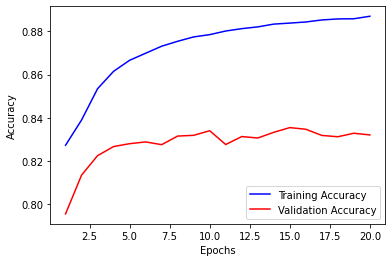

In [21]:
import matplotlib.pyplot as plt

train_acc = training_history.history['binary_accuracy']
val_acc = training_history.history['val_binary_accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1,epok +1,1),training_history.history['binary_accuracy'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_binary_accuracy'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

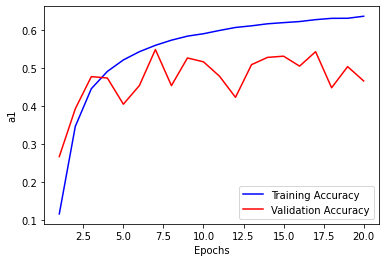

In [22]:
plt.xlabel('Epochs')
plt.ylabel('a1')

plt.plot(np.arange(1,epok +1,1),training_history.history['a1'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_a1'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

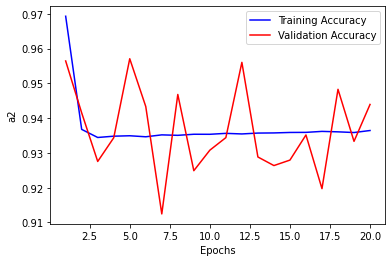

In [23]:
plt.xlabel('Epochs')
plt.ylabel('a2')

plt.plot(np.arange(1,epok +1,1),training_history.history['a2'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_a2'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

In [25]:
# On réalise une prédiction sur un morceau du training/validation set
from IPython.display import Audio
from scipy.io.wavfile import write

i=13
#mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/" + dirs[i] + '/mixture.wav' # si training
mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/" + dirs2[i] + '/mixture.wav' # si validation

audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
#vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Dev/" + dirs[i] + '/vocals.wav' # si training
vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Test/" + dirs2[i] + '/vocals.wav' # si validation
        
audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)

# Passage dans le domaine spectral
f, t, Zxx1 = signal.stft(audio_mixture[debut:fin], fs=sampl_rate, nperseg=1024)

# On écoute le mix
signal_reconstruit = signal.istft(Zxx1, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/mix.wav", sampl_rate, pour_export.astype(np.float32))

In [26]:
from progressbar import ProgressBar

pbar = ProgressBar()

# Normalisation
Zxx1_norm = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)
Zxx1_norm = Zxx1_norm/np.max(Zxx1_norm)

a, b = Zxx1.shape

pred_VAD = np.zeros((b-taille))
pred_VI = np.zeros((513,b-taille))

for j in pbar(range(0,b-taille,1)):   
    Zxx1_i_VAD = Zxx1_norm[0:restriction,0+j:taille+1+j]
    Zxx1_i_VAD = Zxx1_i_VAD[np.newaxis,:,:,np.newaxis]

    Zxx1_i_VI = Zxx1_norm[:,0+j:taille+1+j]
    Zxx1_i_VI = Zxx1_i_VI[np.newaxis,:,:,np.newaxis]
    
    prediction_VAD = model.predict(Zxx1_i_VAD)
    prediction_VAD = np.round(prediction_VAD)
    
    pred_VAD[j] = prediction_VAD

    if prediction_VAD == 1:
       prediction_VI = model2.predict(Zxx1_i_VI)
       prediction_VI_r = np.round(prediction_VI)

       pred_VI[:,j] = Zxx1[:,int(taille/2)+j]*prediction_VI_r[0,:]

pred_VI = np.concatenate((np.zeros((513,int(taille/2))),pred_VI,np.zeros((513,int(taille/2)))),axis=1)

  5% (33 of 637) |#                      | Elapsed Time: 0:00:01 ETA:   0:00:29/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
100% (637 of 637) |######################| Elapsed Time: 0:00:42 Time:  0:00:42


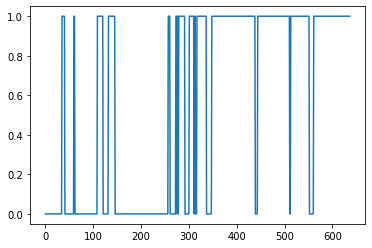

In [ ]:
plt.plot(pred_VAD)

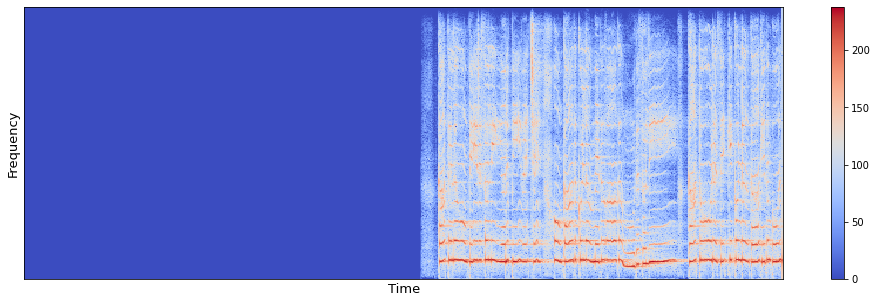

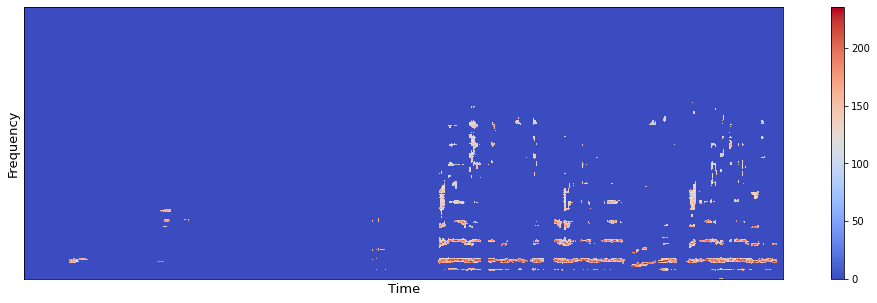

In [27]:
# On affiche le vocal
f, t, Zxx2 = signal.stft(audio_vocal[debut:fin], fs=sampl_rate, nperseg=1024)

plt.figure(figsize=(17,5))
librosa.display.specshow(10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12), cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();


# On affiche le masque * mix
plt.figure(figsize=(17,5))
librosa.display.specshow(10*np.log((np.abs(pred_VI)**2+1e-12)/1e-12), cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();

In [28]:
# Ecoute canal vocal
signal_reconstruit0 = signal.istft(Zxx2, fs=sampl_rate)

Audio(np.array(signal_reconstruit0)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit0)[1,:]

#write("/content/gdrive/My Drive/vocal.wav", sampl_rate, pour_export.astype(np.float32))

In [29]:
# Ecoute vocal après calcul
signal_reconstruit1 = signal.istft(pred_VI, fs=sampl_rate)

Audio(np.array(signal_reconstruit1)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit1)[1,:]

#write("/content/gdrive/My Drive/vocal_calcule.wav", sampl_rate, pour_export.astype(np.float32))

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         inf         inf         inf
          inf         inf         inf         inf         inf         inf
          inf         inf         inf         inf         inf         inf]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan -8.68524023  2.62064249  3.20771418
   4.02056665  3.72171241  3.12472949  2.7457441   2.2157296   2.0860148
   2.67300512  5.29473514  2.15033174  2.22725104  2.85234149  1.55895746]]
[[         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           inf          inf          inf          inf    

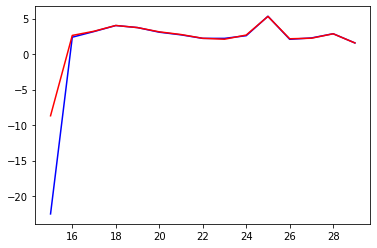

In [ ]:
# Calcul du SDR

#!pip install museval

import museval

(sdr, isr, sir, sar) = museval.evaluate(signal_reconstruit0, signal_reconstruit1, win=11025, hop=11025)

print(sdr)

data = np.loadtxt('/content/gdrive/My Drive/VI_SDR.dat')

print(data)

plt.plot(data[1,:],'-b',sdr[1,:],'-r')

np.savetxt('/content/gdrive/My Drive/VAD_VI_SDR.dat', sdr)